http://stackoverflow.com/questions/17393592/how-do-i-speed-up-fractal-generation-with-numpy-arrays

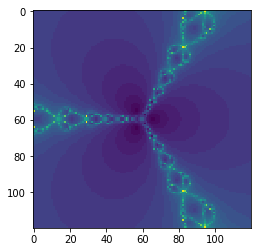

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import count

def newton_fractal(xmin, xmax, ymin, ymax, xres, yres):
    yarr, xarr = np.meshgrid(np.linspace(xmin, xmax, xres), \
                             np.linspace(ymin, ymax, yres) * 1j)
    arr = yarr + xarr
    ydim, xdim = arr.shape
    arr = arr.flatten()
    f = np.poly1d([1,0,0,-1]) # x^3 - 1
    fp = np.polyder(f)
    counts = np.zeros(shape=arr.shape)
    unconverged = np.ones(shape=arr.shape, dtype=bool)
    indices = np.arange(len(arr))
    for i in count():
        f_g = f(arr[unconverged])
        new_unconverged = np.abs(f_g) > 0.00001
        counts[indices[unconverged][~new_unconverged]] = i
        if not np.any(new_unconverged):
            return counts.reshape((ydim, xdim))
        unconverged[unconverged] = new_unconverged
        arr[unconverged] -= f_g[new_unconverged] / fp(arr[unconverged])

N = 120
pic = newton_fractal(-10, 10, -10, 10, N, N)

plt.imshow(im)